# **STUDENT AI** - EDA
Exploratory Data Analysis

## Objectives

Conduct Exploratory analyis of the data to glean insights into how it might be used to solve the business case. Final objective is to identify significant variables to train the model on.

## Inputs

Cleaned Dataset from previous notebook.

## Outputs

None


### Install new libraries needed for EDA

In [1]:
!pip install pingouin
!pip install feature_engine

---

# Import required libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import ppscore as pps
import pingouin as pg
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from feature_engine import transformation as vt
from sklearn.pipeline import Pipeline

print('All Libraries Loaded')

All Libraries Loaded


/tmp/ipykernel_800/2796199378.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Change working directory

### Set the working directory to notebook parent folder
If the output does not match, click **'clear all outputs'** and then **'restart'** the notebook. 
Then run cells from top to bottom.

In [3]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('If correct, Active Directory should read: /workspace/student-AI')
print(f"Active Directory: {current_dir}")

If correct, Active Directory should read: /workspace/student-AI
Active Directory: /workspace/student-AI


### Load cleaned dataset

In [4]:
df = pd.read_csv(f"outputs/dataset/Expanded_data_with_more_features_clean.csv")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
1,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
2,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,5 - 10,73,84,79
3,female,group B,some college,standard,completed,widowed,never,no,1,private,5 - 10,85,93,89
4,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19243 entries, 0 to 19242
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19243 non-null  object
 1   EthnicGroup          19243 non-null  object
 2   ParentEduc           19243 non-null  object
 3   LunchType            19243 non-null  object
 4   TestPrep             19243 non-null  object
 5   ParentMaritalStatus  19243 non-null  object
 6   PracticeSport        19243 non-null  object
 7   IsFirstChild         19243 non-null  object
 8   NrSiblings           19243 non-null  int64 
 9   TransportMeans       19243 non-null  object
 10  WklyStudyHours       19243 non-null  object
 11  MathScore            19243 non-null  int64 
 12  ReadingScore         19243 non-null  int64 
 13  WritingScore         19243 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.1+ MB


## remove 'group ' string from 'EthnicGroup'

In [6]:
df['EthnicGroup'] = df['EthnicGroup'].str.replace('group ', '', regex=False)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
1,male,C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
2,female,B,associate's degree,standard,none,married,regularly,yes,1,school_bus,5 - 10,73,84,79
3,female,B,some college,standard,completed,widowed,never,no,1,private,5 - 10,85,93,89
4,male,B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39


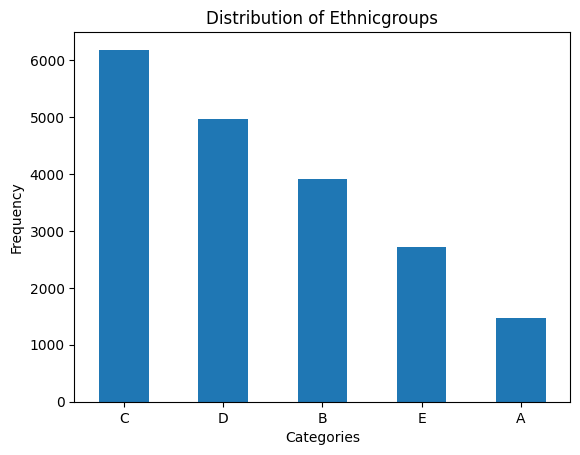

In [7]:
distribution = df['EthnicGroup'].value_counts()
distribution.plot(kind='bar')
plt.title('Distribution of Ethnicgroups')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

removing the string 'groups' and assessing the distribution of EthnicGroup shows the data is also not balanced and will need to be eningeered.

## Assess distribution of numerical data

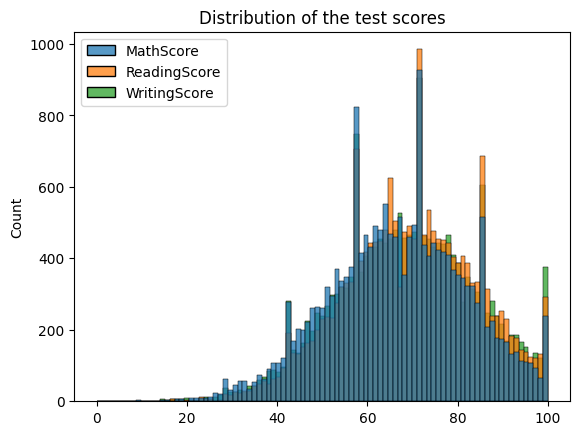

In [10]:
sns.histplot(df[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');


In [11]:
df.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.256164,73.068338,73.070588
male,69.091994,65.885720,63.990283
